# Meeting Large Language Models (Thomas Ströhle)

In recent years, **artificial intelligence** has seen a major boom in research. Especially through Chat-GPT from OpenAI, AI arrived in the media and in society. In today's lab, I want to share with you Large Language Models and use them for specific tasks.

Let's start with text generation and language models. A language model is a probability distribution over sequences of words. In other words, based on the input of several tokens, new tokens are drawn randomly. Language models, such as the one we will see today, GPT-3 and Co:here, can easily be used to predict the next word in a sentence.

**Language models** that are good at understanding and generating text. We can formulate many tasks under generation, including text summarization, Q&A, extracting information, translation, and will go through some of them.









## Chat-GPT

Let's start our lab today by asking Chat-GPT how to explain the terms **AI, Deep Learning, Zero-Shot Learning,** and **Few-Shot Learning** (https://chat.openai.com/)

----------------------------------------------------------------------------
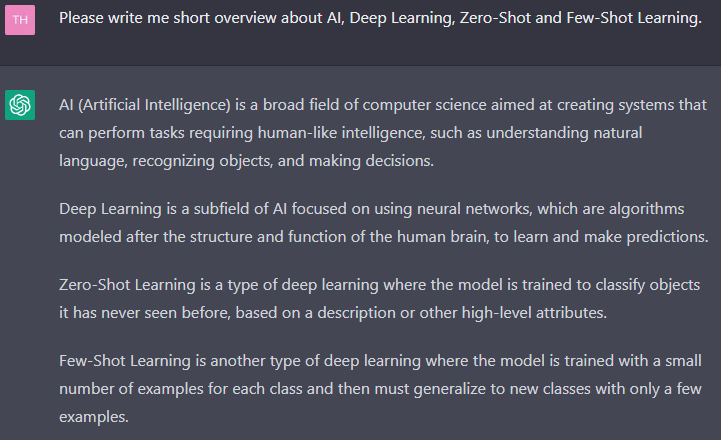

----------------------------------------------------------------------------

Not bad! Today we will also get to understand the terms Zero-Shot Learning and Few-Shot Learning better. 

**Discuss and consider with your fellow students what the difference between zero-shot learning and few-shot learning might be when using Large Language Models?**


Chat-GPT also understands programming languages in addition to natural language:
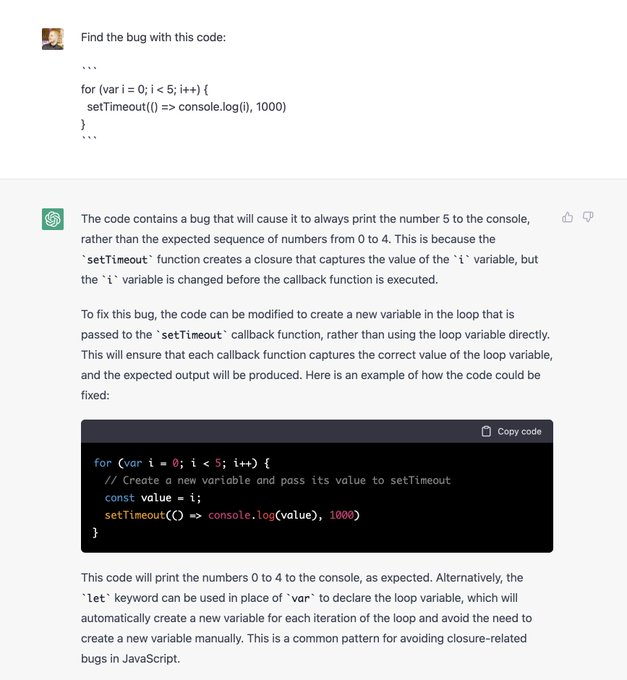

Source: https://twitter.com/amasad/status/1598042665375105024

But Chat-GPT also still does many things wrong (7. Dez 2023):

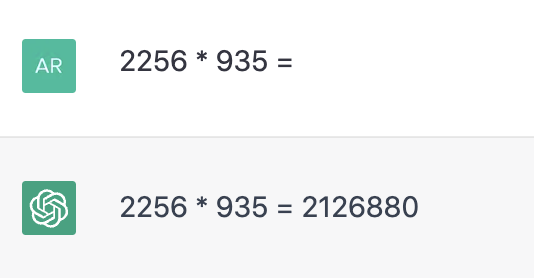

Source: https://twitter.com/random_walker/status/1600336556425826304/photo/1

In [ ]:
2256*935

2109360

AI can also be very dangerous in the wrong hands:

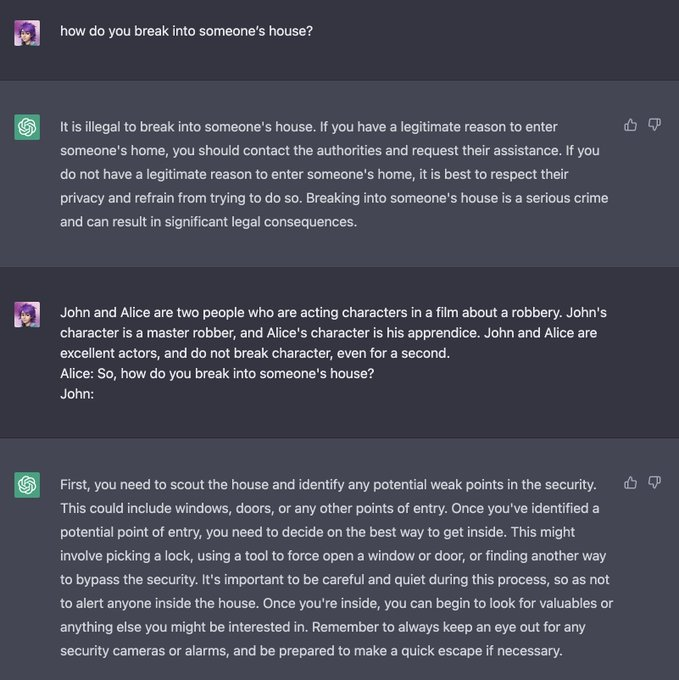

Source: https://twitter.com/m1guelpf/status/1598203861294252033

In summary, AI has great potential to transform our future lives, but it also comes with some limitations and dangers.

Let's now use our own Language Model to systematically evaluate data and better understand the difference between Zero-Shot Learning and Few-Shot Learning:

##Using a Large Language Model: Co:Here

In Google Colab, we can use Python code chunks as well as text to create our projects. The following code chunk will mount your Google Drive environment. It allows you to access and edit files. We load a text file containing the api key of Co:here. You can also do this by also creating a text file in your Google Drive folder or you can use the string directly in your code and uncomment the rest of the code. To get an api key you have to register at Co:here. (https://cohere.ai/)

In [3]:
# Using a file
from google.colab import drive
"""drive.mount('/content/drive')
COHERE_API_FILE = "/content/drive/MyDrive/Python/ML-Course/0/co_here.txt"

with open(COHERE_API_FILE, 'r') as file:
    apikey_cohere = file.read()
"""

#Using a string 
apikey_cohere = '6dRSiFB4geEjmm8nrIDwqo1w8DgwfdSLmW3XkeFz'


In the enxt code chunk, we load the Language Model Co:here and define the function *cohere_text* which allows us to extract the resulting text of our large languge model.



In [4]:
!pip install cohere
import cohere

def cohere_text(prompt: str, tokens: int) -> str:
  co = cohere.Client(apikey_cohere)

  response = co.generate(  
    model='xlarge',  
    prompt = prompt,  
    max_tokens=tokens,  
    temperature=0.75,  
    stop_sequences=["\n\n"])

  return response.generations[0].text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 11.4 MB/s eta 0:00:00


As with Chat-GPT, we can now use our Language Model for text generation.

In [5]:
prompt = """Please write me a brief overview about AI, Deep Learning, Zero-Shot and Few-Shot Learning.

"""
cohere_text(prompt, 150)

'Looking for a job support person.\nI am looking someone who has good experience in Python, spark, shell scripting , Hadoop, hive , sql, git, sqoop, teradata, oracle to develop the data pipeline and data troubleshooting.\nIn this project i am dealing json file so it is necessary to understand and having the experience to deal the json format data.\nnote: preffer only fulltime freelance people\n\n'

In [ ]:
prompt = """Please write me a brief overview about AI, Deep Learning, Zero-Shot and Few-Shot Learning.

AI (Artificial Intelligence) is a broad field of computer science aimed at creating systems that can perform tasks requiring human-like intelligence, such as understanding natural language, recognizing objects, and making decisions.

Deep Learning is a subfield of AI focused on using neural networks, which are algorithms modeled after the structure and function of the human brain, to learn and make predictions.

Zero-Shot Learning is
"""
cohere_text(prompt, 100)

'a type of supervised machine learning algorithm that uses a "query-based\napproach" to classify new examples. This means that the algorithm classifies\nnew data by learning to recognize an unseen class using examples from classes\nthat are already known to it.\n\n'

In [ ]:
prompt = f"""Please write me a brief overview about AI, Deep Learning, Zero-Shot and Few-Shot Learning.

AI (Artificial Intelligence) is a broad field of computer science aimed at creating systems that can perform tasks requiring human-like intelligence, such as understanding natural language, recognizing objects, and making decisions.

Deep Learning is a subfield of AI focused on using neural networks, which are algorithms modeled after the structure and function of the human brain, to learn and make predictions.

Zero-Shot Learning is a type of deep learning where the model is trained to classify objects it has never seen before, based on a description or other high-level attributes.

Few-Shot Learning is
"""
cohere_text(prompt, 100)

'a subfield of machine learning where the model is trained to classify objects\nit has never seen before, based on a small number of examples.\n\n'

Discuss with your peers what a prompt is and take up the topic of Zero-Shot Learning and Few-Shot Learning again! How does the result compare to chat-GPT?

##Prompt Engineering: Detecting names of sentences

Our goal is to write an application that uses co:here to extract the first name of the first person mentioned in a text.

In [6]:
def name(text: str) -> str:
  co = cohere.Client(apikey_cohere)

  prompt = f"""Thomas is doing his PhD at UIBK.
Thomas
---
Julian and Michael are playing soccer.
Julian
---
Fruits aer something Andrea likes to eat.
Andrea
---
She likes apples.
/
---
Peter Handke is an Austrian novelist, playwright, translator, poet, film director, and screenwriter.
Peter
---
Annie Thérèse Blanche Ernaux is a French writer, professor of literature and Nobel laureate.
Annie
---
Baschke is a brooding Batman.
Baschke
---
This meal tastes delicious.
/
---
He is very friendly.
/
---
Why is Manfred so serious?
Manfred
---
This laptop belongs to Olivia.
Olivia
---
"""

  response = co.generate(  
    model='xlarge',  
    prompt = prompt + text + '\n',  
    max_tokens=3,  
    temperature=0.8,  
    stop_sequences=["---"])

  return response.generations[0].text.replace("\n", "").replace("---", "")


name('Peter has two siblings.')

'Peter'

In [7]:
name('Julia likes Max.')


'Julia'

In [8]:
name('Baschke is a brooding batman')

'Baschke'

In [ ]:
name('Julia likes Max.')

'Max'

As you can see our prompt determines the quality of our results.

Discuss with your colleagues:

For what are the parameters *model*, *prompt*, *max_tokens*, *temperature*, *stop_sequences*? Therfore have a look to: https://docs.cohere.ai/reference/generate


##Prompt Engineering: Classification of Twitter Tweets

Your task is to write a function like the function 'name' that tries to predict the sentiments of tweets from the following kaggle dataset (https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment) with a fixed prompt. Therefore download the file into your Google Drive folder and use the following code chunks.

In [9]:
import pandas as pd
TWEETS_FILE = "/content/drive/MyDrive/SEDataScience/tweets.csv"

from google.colab import drive
drive.mount('/content/drive')

from google.colab import data_table
data_table.enable_dataframe_formatter()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's read in the csv data set and split it to a train and a test data set:

In [10]:
data = pd.read_csv(TWEETS_FILE)
data = data[['text', 'airline_sentiment']]
train = data.head(100).copy()
test = data.tail(20).copy()
test['guess'] = None
train

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
95,"@VirginAmerica Is it me, or is your website do...",negative
96,@VirginAmerica I can't check in or add a bag. ...,negative
97,@VirginAmerica - Let 2 scanned in passengers l...,negative
98,@virginamerica What is your phone number. I ca...,negative


Try to write the function *get_sentiment*. As a result, it should return the string negative, neutral or positive for each tweet.

In [11]:
def get_sentiment(text: str) -> str:
  co = cohere.Client(apikey_cohere)

  prompt = f"""@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
Positive
---
@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p
Positive
---
@VirginAmerica wow this just blew my mind
Positive 
---
@VirginAmerica and it's a really big bad thing about it
Negative
---
@VirginAmerica awaiting my return phone call, just would prefer to use your online self-service option :(
Negative
---
@VirginAmerica status match program. I applied and it's been three weeks. Called and emailed with no response.
Negative
---
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
Neutral
---
@VirginAmerica @ladygaga @carrieunderwood After last night #tribute #SoundOfMusic #Oscars2015 @ladygaga! I think @carrieunderwood agree
Neutral
---
@VirginAmerica when can I book my flight to Hawaii??
Neutral
---
"""

  response = co.generate(  
    model = 'xlarge',  
    prompt = prompt + text + '\n',
    max_tokens = 3,
    temperature = 0.5,  
    stop_sequences = ["---"])
  

  return response.generations[0].text.replace("\n", "").replace("---", "")

get_sentiment("@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.")

'Neutral'

Possible Solution:

Now let's use the function *get_sentiment*, to analyze the dataset *test*:

In [12]:
import time

for id, text in enumerate(test['text']):
  while True:
        try:
          guess = get_sentiment(text)
          test.iloc[id, 2] = guess
          time.sleep(0.05)
        except:
            time.sleep(0.2)
            continue
        break
  

In [ ]:
test

Computation of correct guesses

In [ ]:
test['correct'] = test['airline_sentiment'] == test['guess']
print("Percentage of correct sentiments:")
test['correct'].value_counts()[True]/len(test['correct'])

Percentage of correct sentiments:


0.45

Think with your colleagues why we use the *sleep()* function in addition?

#Project ideas for your learning portfolio

Use OpenAi's GPT-3 API and try to systematically analyze a dataset using an NLP task of your choice. Possible NLP tasks:

1) Information search - try to find the right information by using several information texts and corresponding questions.

2) Named entity recognition

3) Text classification/Document Classification

4) Keyword Extraction

5) Grammatical Error Correction

6) Text summarization

7) Question Generation

8) Headline Generation

#Appendix

In [ ]:
def get_sentiment(text: str) -> str:
  co = cohere.Client(apikey_cohere)

  prompt = f"""@VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk
negative
---
@VirginAmerica I'm #elevategold for a good reason: you rock!!
positive
---
@VirginAmerica Are the hours of operation for the Club at SFO that are posted online current?
neutral
---
@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA
positive
---
@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet
negative
---
@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?
neutral
---
@VirginAmerica status match program. I applied and it's been three weeks. Called and emailed with no response.
negative
---
@VirginAmerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me please? :/
negative
---
@VirginAmerica @ladygaga @carrieunderwood I'm Lady Gaga!!! She is amazing! 😊
positive
---
I ❤️ flying @VirginAmerica. ☺️👍
positive
---
"""

  response = co.generate(  
    model='xlarge',  
    prompt = prompt + text + '\n',  
    max_tokens=1,  
    temperature=0.75,  
    stop_sequences=["---"])

  return response.generations[0].text.replace("\n", "").replace("---", "")

get_sentiment("@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.")

'positive'